<a href="https://colab.research.google.com/github/andersonkstro/Meu-Portfolio/blob/master/DadosEnem2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = yellow> Analisando dados do ENEM 2021

#<font color = black> Importando as bibliotecas, montando Drive no Google e Mostrando os dados

#<font color = yellow> Extraindo Fazendo Análise Exploratória dos dados.

In [1]:
from pandas import read_csv

#Montando drive do Google
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

fonte = '/content/drive/MyDrive/FonteDados/DadosEnem2021/MICRODADOS_ENEM_2019_SAMPLE_43278.txt'
dados = pd.read_csv(fonte)
dados.head()


Mounted at /content/drive


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [2]:
print('Tamanho do conjunto de dados:', dados.shape)


Tamanho do conjunto de dados: (127380, 136)


In [3]:
# Verificando as unidade federativas das provas e quantidade

UF = dados['SG_UF_PROVA'].unique()
qtd = len(dados['SG_UF_PROVA'].unique())

print('UF :', UF)
print('Quantidade : ', qtd)

UF : ['PA' 'RO' 'AM' 'RR' 'PR' 'PI' 'AC' 'MT' 'MA' 'CE' 'SP' 'AP' 'TO' 'SC'
 'GO' 'BA' 'MG' 'SE' 'PE' 'AL' 'RJ' 'RN' 'PB' 'ES' 'RS' 'MS' 'DF']
Quantidade :  27


In [4]:
# Verificando a quantidade de inscritos por UF em ordem alfabética

dados['SG_UF_PROVA'].value_counts().sort_index()


AC      953
AL     2219
AM     2821
AP     1059
BA     9956
CE     7370
DF     2447
ES     2537
GO     4266
MA     5490
MG    13463
MS     1661
MT     2234
PA     7131
PB     3676
PE     7024
PI     3071
PR     5275
RJ     8484
RN     2954
RO     1391
RR      364
RS     5452
SC     2708
SE     1884
SP    20339
TO     1151
Name: SG_UF_PROVA, dtype: int64

In [5]:
# Por Município
#dados.query('NO_MUNICIPIO_RESIDENCIA == Marabá')
dados['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_index()

Abadia de Goiás         14
Abadia dos Dourados      8
Abadiânia               11
Abaetetuba             165
Abaeté                  13
                      ... 
Álvaro de Carvalho       3
Áurea                    2
Érico Cardoso            2
Óbidos                  28
Óleo                     2
Name: NO_MUNICIPIO_RESIDENCIA, Length: 4889, dtype: int64

In [6]:
# Verificando por idade

dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0.5, 1.0, 'Por Idade')

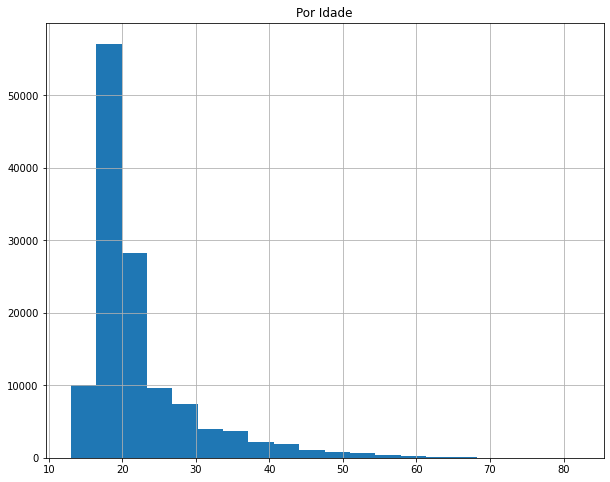

In [7]:
# 1 Histograma
import matplotlib.pyplot as plt
import seaborn as sns


dados['NU_IDADE'].hist(bins=20, figsize=(10,8))
plt.title('Por Idade')

<font color = white>
Não conseguimos fazer uma interpretação razoável dos dados de idade no gráfico.

Text(0.5, 1.0, 'Histograma Por Idade')

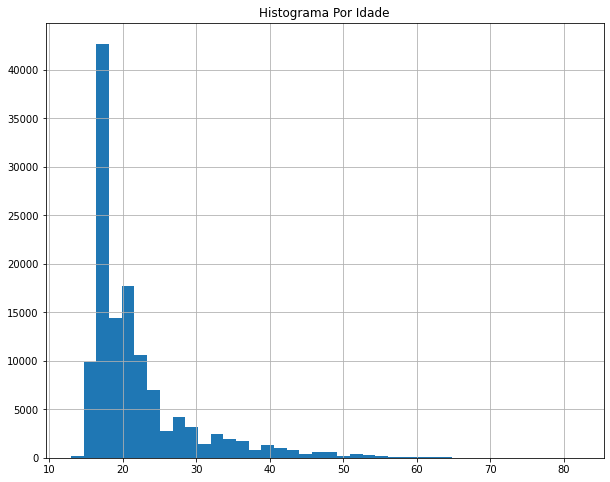

In [8]:
# 2 Histograma

dados['NU_IDADE'].hist(bins=40, figsize=(10,8))
plt.title('Histograma Por Idade')

<font color = white> Com um bins configurado adequadamente, percebemos que a maioria dos inscritos estão entre 16 a 20 anos de idade. 

Treineiros :
 0    111979
1     15401
Name: IN_TREINEIRO, dtype: int64
Treineiros :  AxesSubplot(0.125,0.125;0.775x0.755)


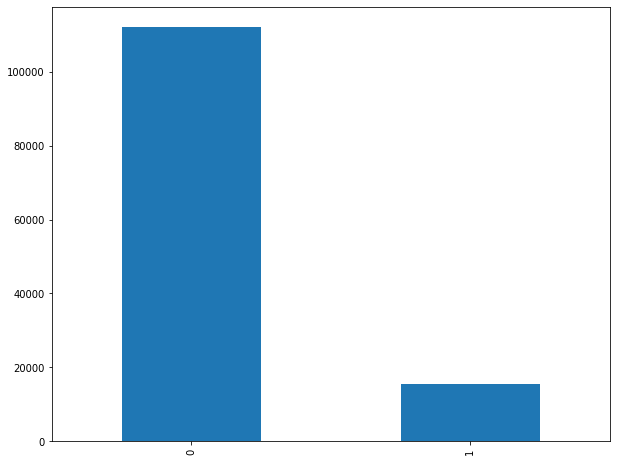

In [9]:
# Podemo verificar também e colocar dentro da mesma visualização do Boxplot mais uma variável do nosso dicionário que são os treineiros sim ou não.

# 1 - Treineiros
# 0 = Não Treineiros

print("Treineiros :\n",dados['IN_TREINEIRO'].value_counts())
print("Treineiros : ",dados['IN_TREINEIRO'].value_counts().plot(kind='bar', figsize=(10,8)))


In [10]:
# Verificando proporção por idade

dados['NU_IDADE'].value_counts(normalize=True).sort_index()

13    0.000031
14    0.001107
15    0.015772
16    0.061470
17    0.166871
        ...   
73    0.000016
75    0.000016
76    0.000008
77    0.000008
82    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

Text(0.5, 1.0, 'Estudantes de 14 anos do Enem 2021')

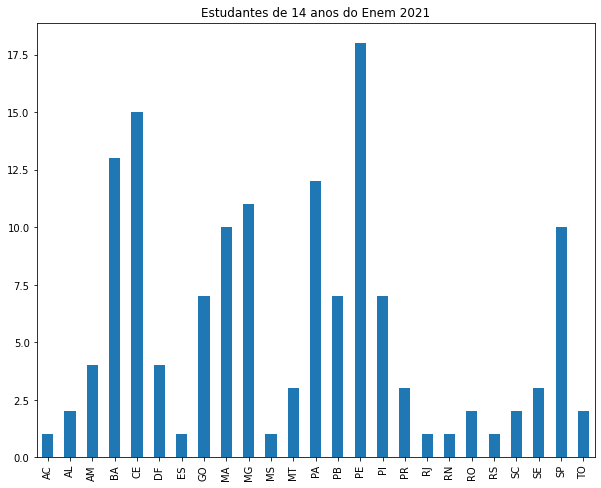

In [11]:
# Veirificando os inscritos de idade = 14 anos por estado

dados.query("NU_IDADE == 14")['SG_UF_PROVA'].value_counts().sort_index().plot(kind='bar', figsize=(10,8))
plt.title("Estudantes de 14 anos do Enem 2021")

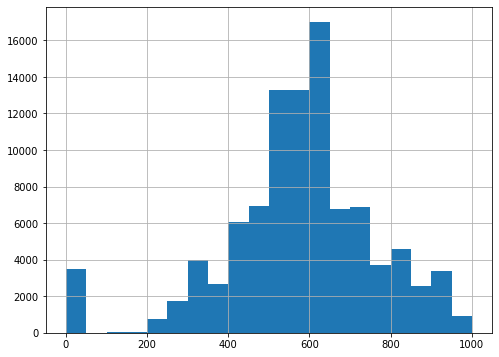

In [12]:
# Notas de Redação
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

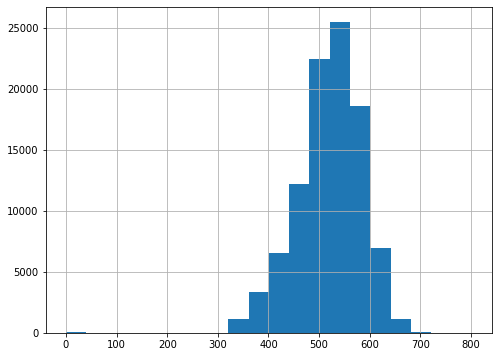

In [13]:
# Notas de Linguagens e códigos
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

In [14]:
# Médias das notas
print(dados["NU_NOTA_REDACAO"].mean())
print(dados['NU_NOTA_LC'].mean())


571.5700253970197
520.4639280723763


In [15]:
# Estatística das notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


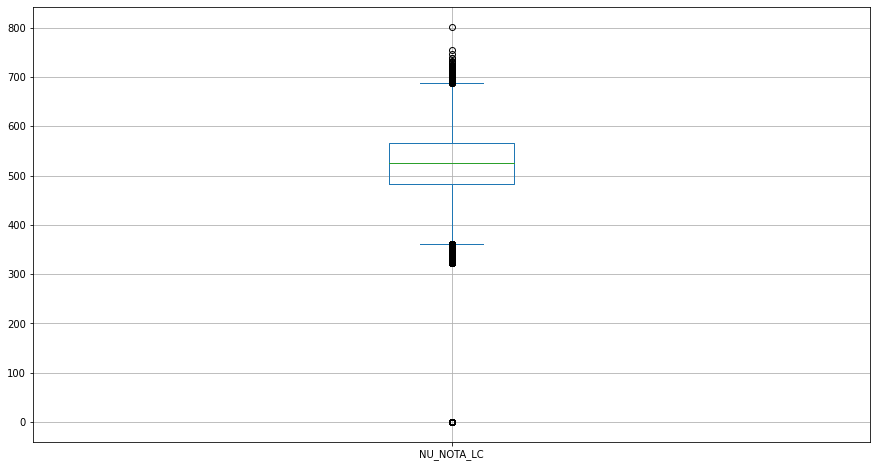

In [16]:
# Plotando um boxplot para analisar as notas de provas

dados['NU_NOTA_LC'].plot.box(grid = True, figsize=(15,8))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


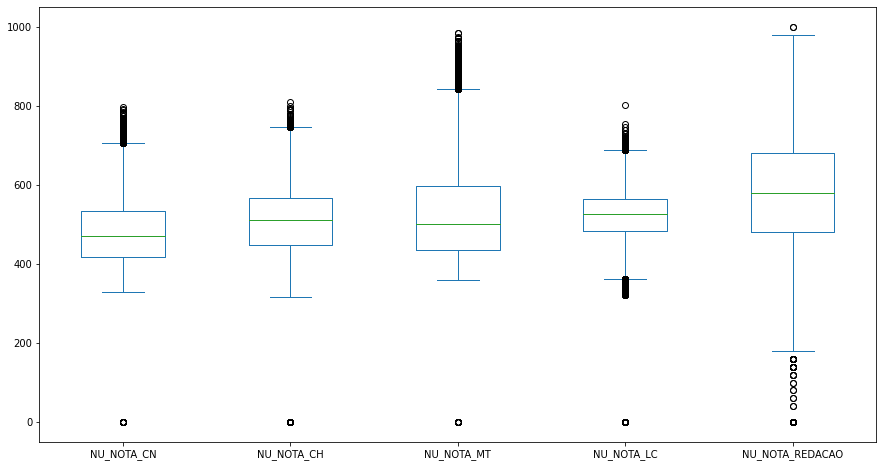

In [17]:
# Agora com todas as notas de provas.

dados[provas].plot.box(figsize=(15,8))

In [18]:
dados['NU_IDADE'].value_counts(normalize=True).sort_values(ascending=False).head()

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
Name: NU_IDADE, dtype: float64

In [19]:
# Estados com os inscritos de 13 anos de idade
dados.query("NU_IDADE == 13")['SG_UF_RESIDENCIA'].unique()

array(['SP', 'MT', 'AP', 'BA'], dtype=object)

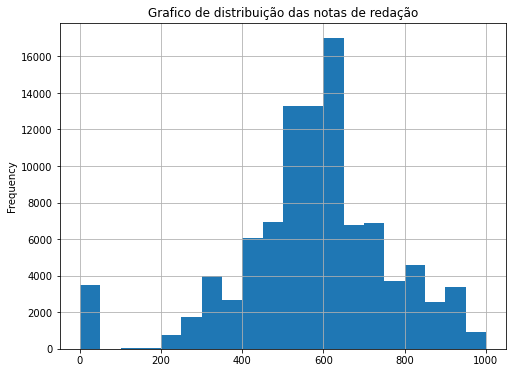

In [20]:
dados['NU_NOTA_REDACAO'].plot.hist(bins=20, figsize=(8, 6), title="Grafico de distribuição das notas de redação", grid=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


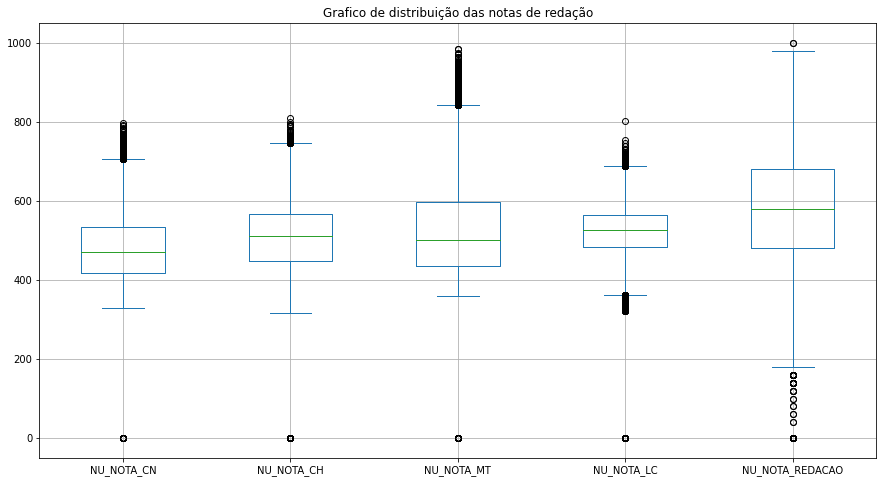

In [21]:
dados[provas].plot.box(grid=True, figsize= (15,8), title="Grafico de distribuição das notas de redação")

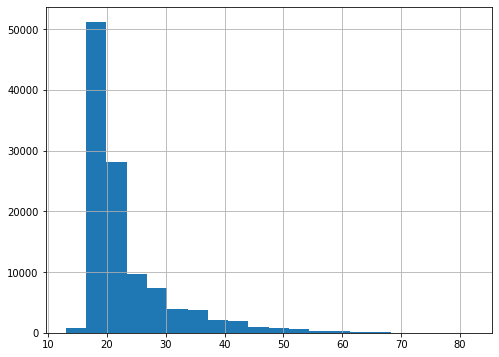

In [22]:
#Histogramas das idades dos do treineiro e não treineiros.
dados_nao_treineiros = dados.query("IN_TREINEIRO == 0")
dados_nao_treineiros['NU_IDADE'].hist(bins=20, figsize=(8, 6))

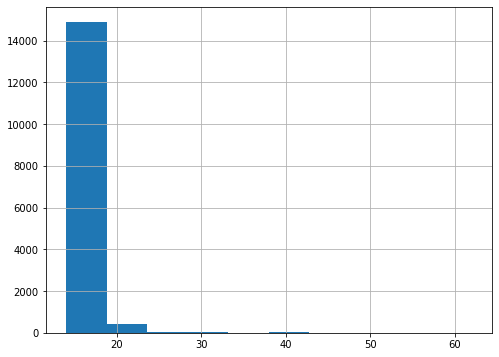

In [23]:
# # Comparar as distribuições das provas em inglês espanho
dados_sim_treineiros = dados.query("IN_TREINEIRO == 1")
dados_sim_treineiros['NU_IDADE'].hist(bins=10, figsize=(8, 6))

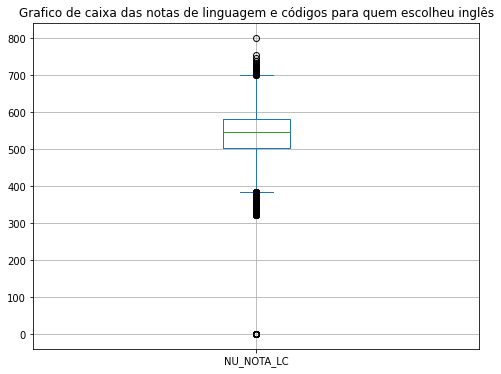

In [24]:
dados_ingles = dados.query("TP_LINGUA == 0")['NU_NOTA_LC']
dados_ingles.plot.box(grid=True, figsize=(8, 6))
_ = plt.title("Grafico de caixa das notas de linguagem e códigos para quem escolheu inglês")

In [25]:
# Criando uma variável para ordenar o eixo x e verificar por renda x notas

renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Notas de Matemática')

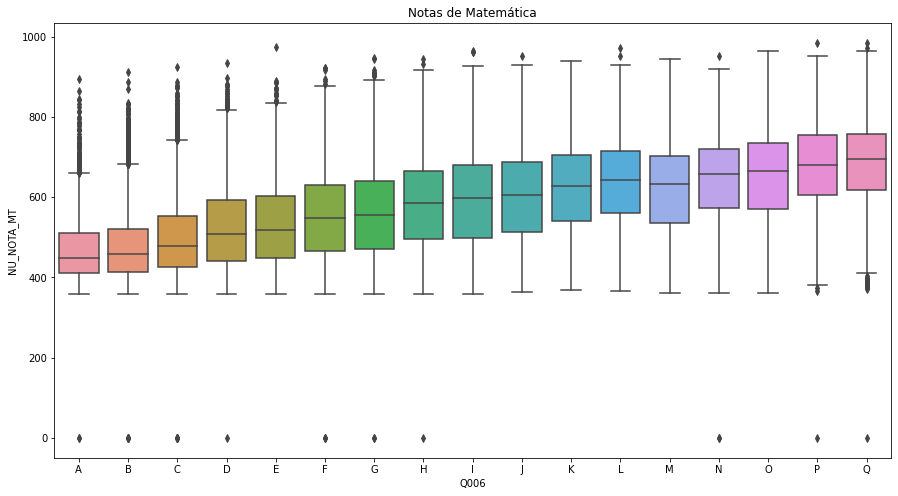

In [26]:
# Boxplot com todas as notas(eixo y) e rendas (eixo x)

plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados, order = renda_ordenada)
plt.title('Notas de Matemática')

Percebemos que quanto maior a renda, maior a nota.

In [28]:
#Observando os valores de provas por tipo
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [29]:
# # Criando uma coluna chamada "NU_NOTA_TOTAL" para o dataset dados com o somatório de todas as notas(provas) por linha(axis=1)
#axis=1 para comar por linha

dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Todas as Notas ')

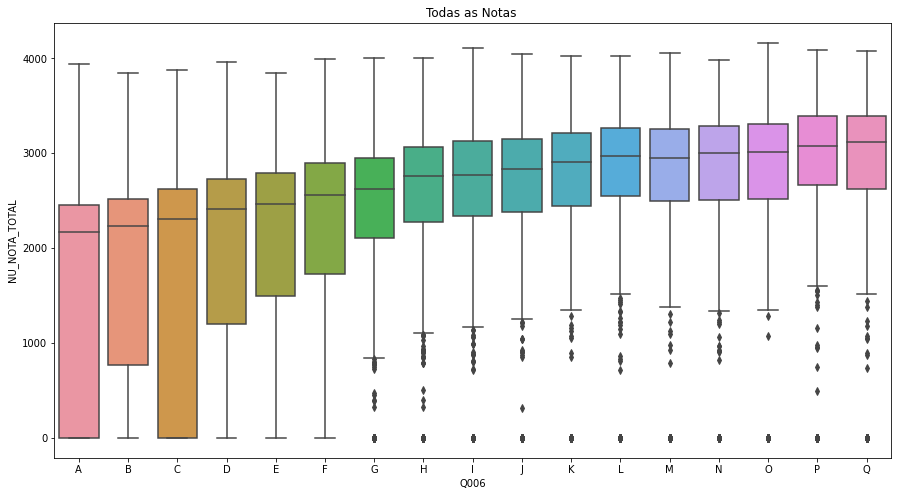

In [30]:
# Verificando agora com todas as notas (variavel criada anteriormente)

plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados, order = renda_ordenada)
plt.title('Todas as Notas ')

Percebemos que quanto maior a renda, maior a nota, contudo existe dentro do nosso dicionário de dados uma colunas de treineiros, precisamos retirá-los dessa análise, assim podemos ter uma conclusão mais enbasada dos dados.

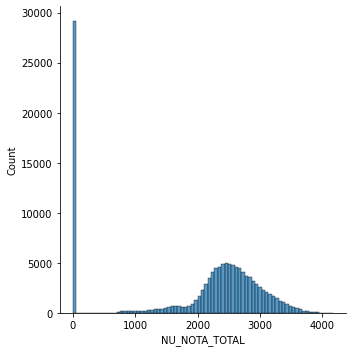

In [31]:
sns.displot(dados, x = 'NU_NOTA_TOTAL')

In [32]:
#provas = ['NU_NOTA_CH', 'NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_CN']

# Vamos retirar as notas zeradas do nosso modelo de visualização

provas.append('NU_NOTA_TOTAL')
dados[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Podemos observar os valores "NAN" que não são notas zeradas, são pessoas que não compareceram para realizar a prova.

In [33]:
# Agora todas as notas diferentes de 0, ou seja, inscritos podem ter zerados em algumas notas mas não em todas.

dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Todas as Notas ')

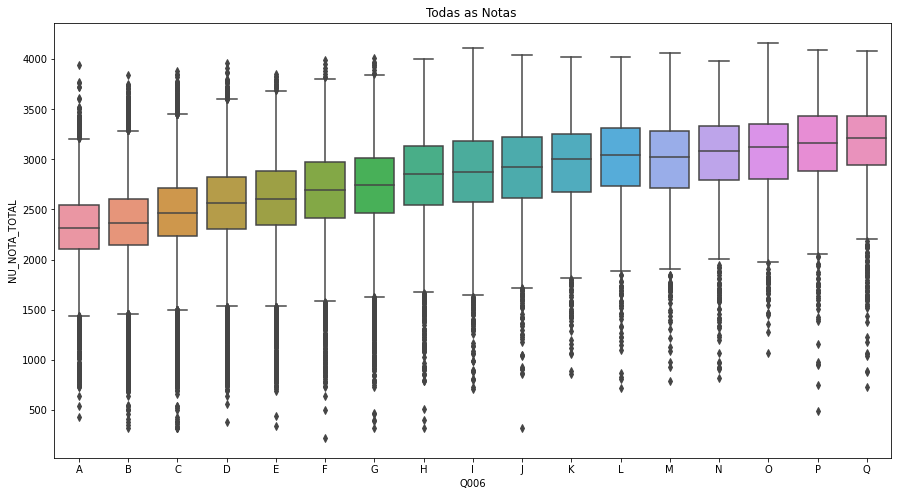

In [34]:
# Verificando agora com a condição construía acima


plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada)
plt.title('Todas as Notas ')

A condição para as notas zeradas em algumas matérias são as mesmas da anterior.

Text(0.5, 1.0, 'Todas as Notas com Treineiros ')

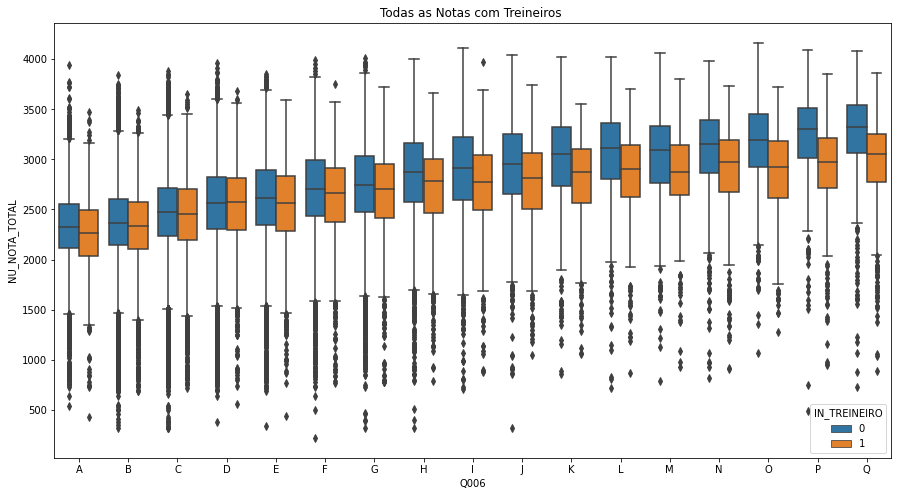

In [35]:
# Com a variável treineiro

plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada, hue = 'IN_TREINEIRO')
plt.title('Todas as Notas com Treineiros ')

Text(0.5, 1.0, 'Todas as Notas com Treineiros ')

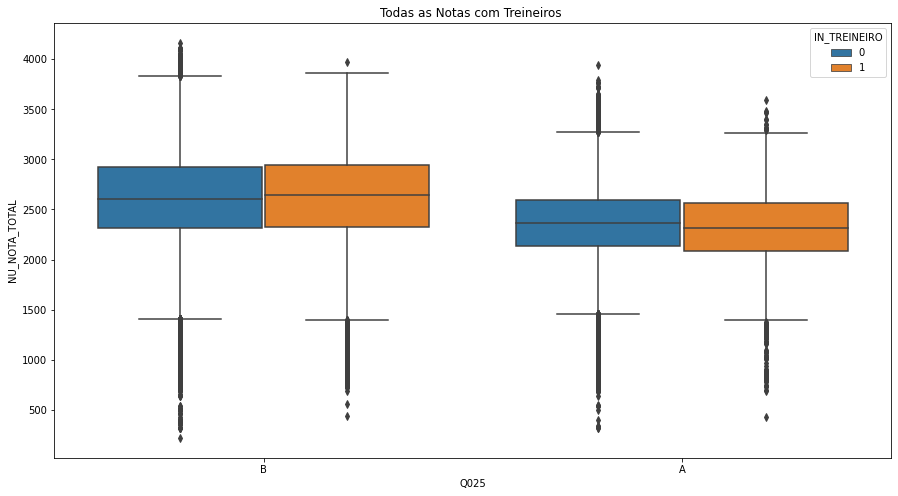

In [59]:
# Internet em sua residência sim ou não


# A - NÃO
# B - SIM


plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q025', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order =  None, hue = 'IN_TREINEIRO')
plt.title('Todas as Notas com Treineiros ')

In [36]:
# Verificando apenas os treineiros por UF
# 1 - Treineiros
# 0 = Não Treineiro

dados.query('IN_TREINEIRO == 1')['SG_UF_PROVA'].value_counts().sort_index()


AC      52
AL     225
AM     175
AP      91
BA    1233
CE    1018
DF     214
ES     269
GO     736
MA     541
MG    1751
MS     215
MT     352
PA     746
PB     417
PE     977
PI     434
PR     678
RJ     925
RN     302
RO     159
RR      47
RS     607
SC     422
SE     277
SP    2345
TO     193
Name: SG_UF_PROVA, dtype: int64

A grande parte dos que não responderam pode fazer uma diferença enorme nas análises.

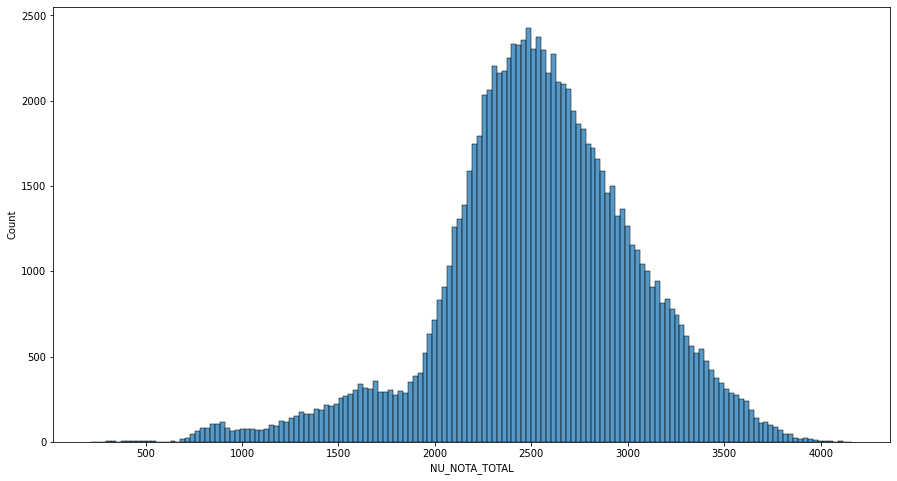

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL')

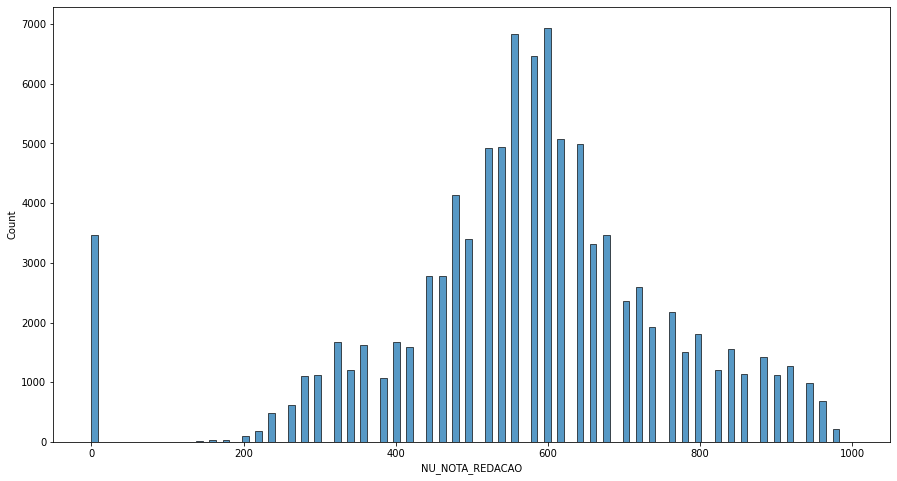

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_REDACAO')

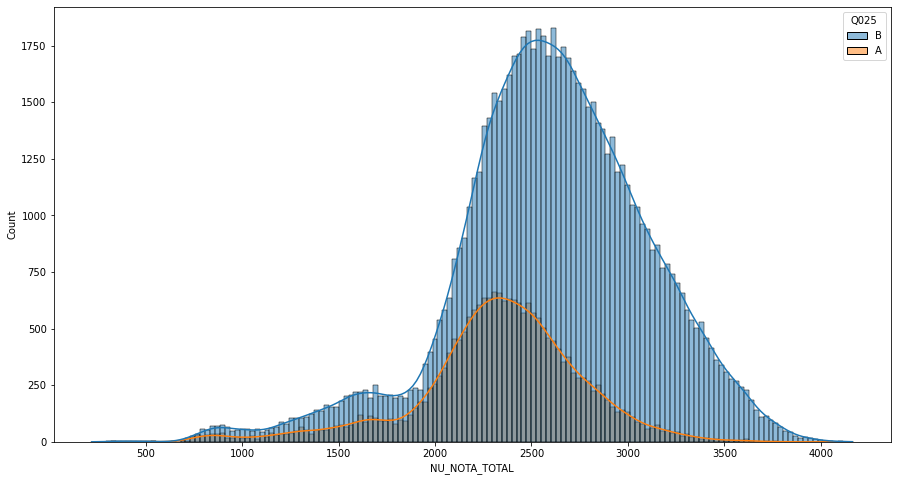

In [62]:
# Veriricando se a pessoa tem internet ou não

# A - Não
# B - Sim

plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = 'True')


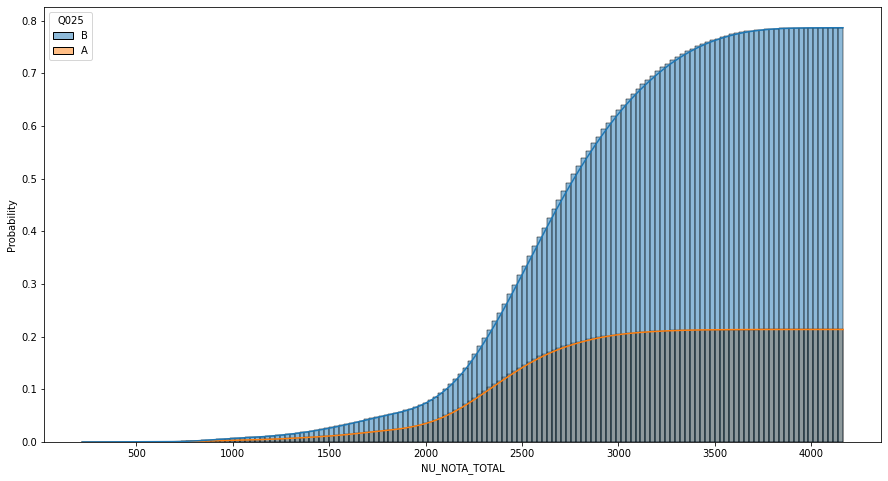

In [66]:
# Comparando o TOPO usando distribuição cumulativa

plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = 'True', stat= 'probability', cumulative = True)

(-50.0, 1050.0)

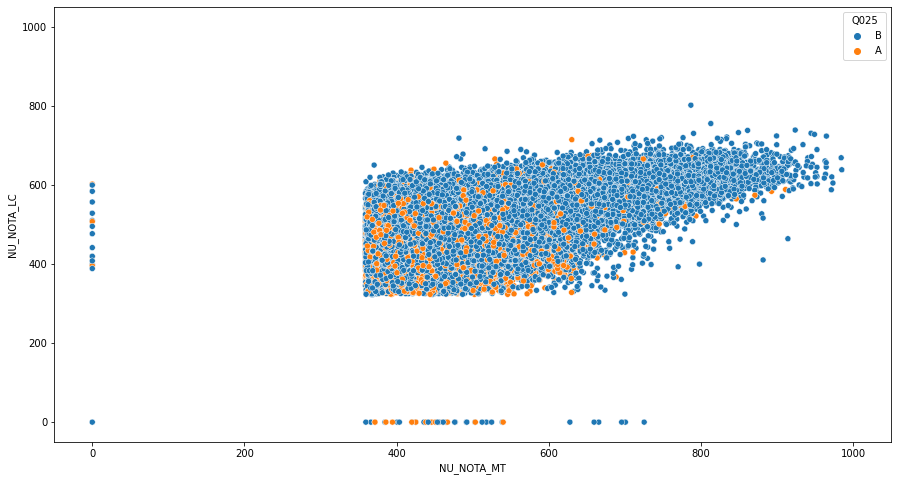

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = dados_sem_nota_zero, x = 'NU_NOTA_MT', y = 'NU_NOTA_LC', hue = 'Q025')
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

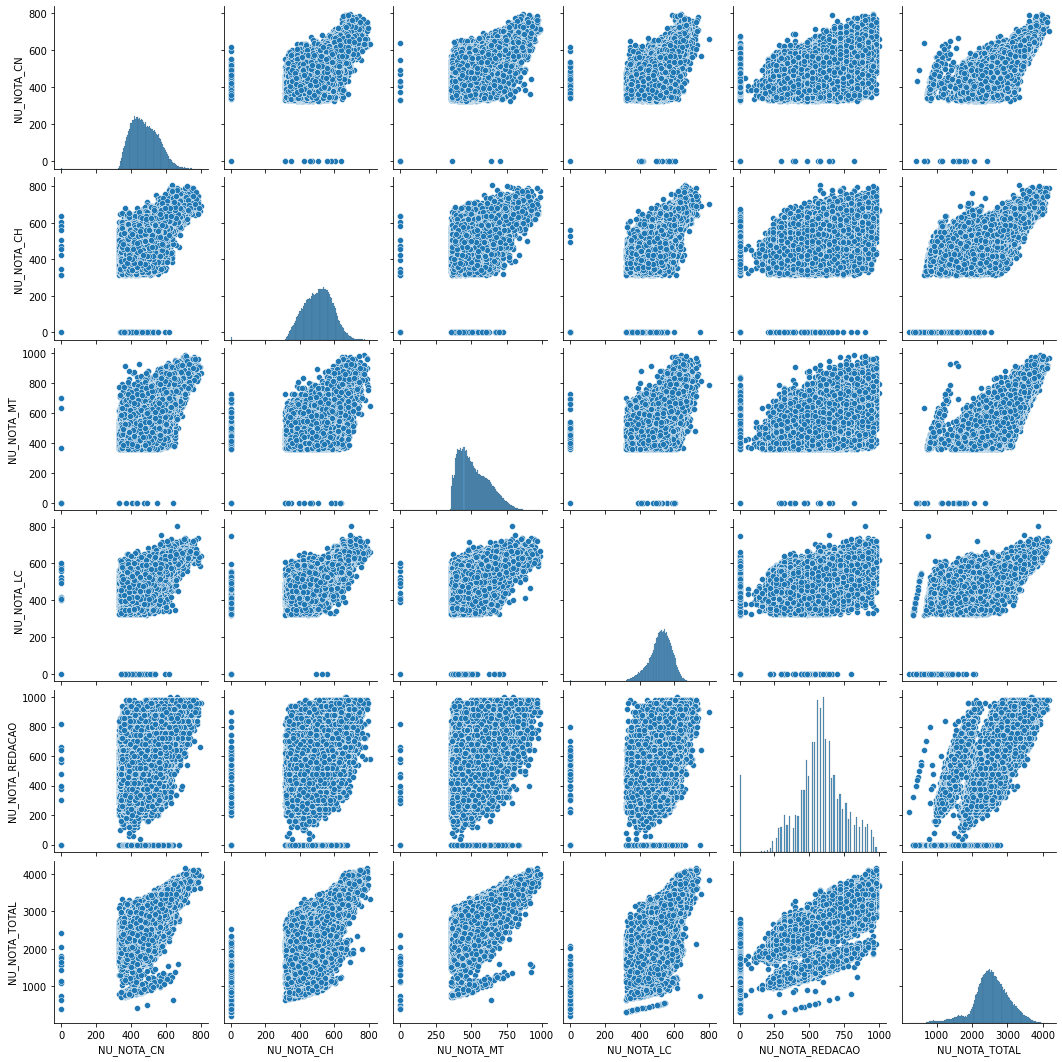

In [68]:
sns.pairplot(dados_sem_nota_zero[provas])

In [69]:
# Correlação

correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


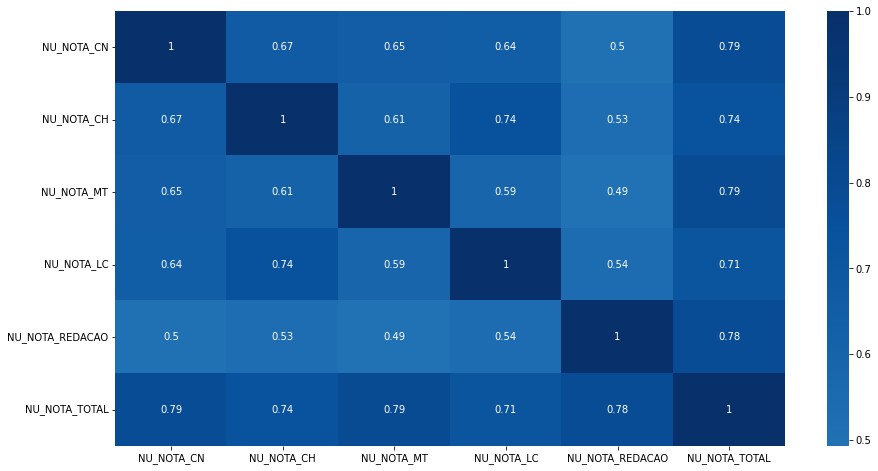

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

<Figure size 1080x576 with 0 Axes>

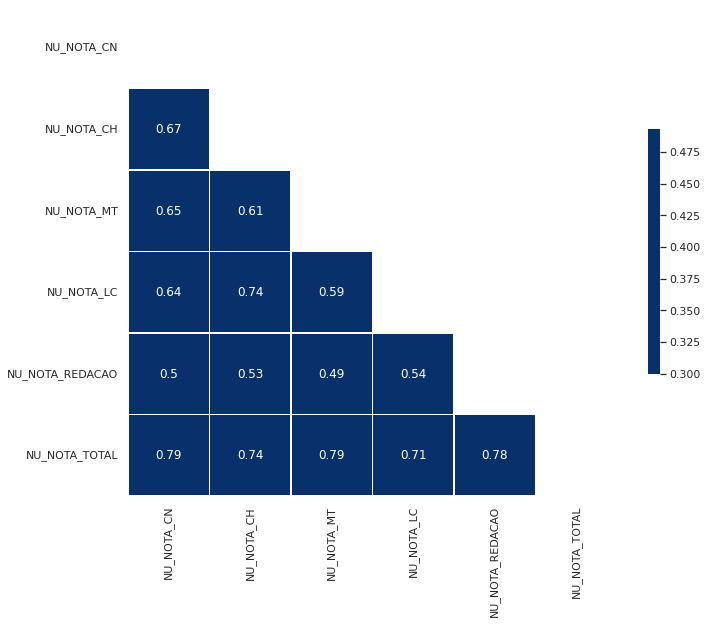

In [71]:
import numpy as np
from string import ascii_letters
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlacao, mask=mask, cmap='Blues', vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#<font color=yellow>Machine Learning

In [72]:
provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
provas_saida = 'NU_NOTA_MT'
# Eliminando os valores NAN do conjunto de dados para evitar erros ao treinar o modelo

dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]



In [74]:
# Amostra dos dados de notas de entrada
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [75]:
x = notas_entrada
y = notas_saida

In [76]:
from sklearn.model_selection import train_test_split

seed = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.25,
                                                        random_state= seed)

In [77]:
# LinerSVR é uma variação de SVM (suporte Vector Machine) é um modelo linear
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state= seed)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(random_state=4321)

In [78]:
# Vamos fazer agora uma predição, ou seja, predict da nossa variável x_teste (matemática)

modelo.predict(x_teste)

array([420.31950108, 478.71700082, 385.7069269 , ..., 471.7623776 ,
       540.54672299, 353.78044694])

In [79]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

In [80]:
previsoes_matematica = modelo.predict(x_teste)

(-50.0, 1050.0)

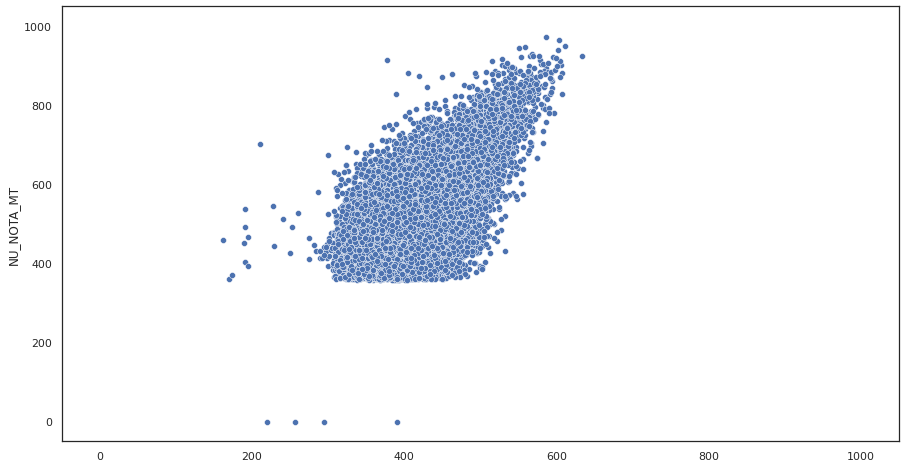

In [81]:
# plotando em um scatterplor as previções com os dados de teste y
plt.figure(figsize=(15,8))
sns.scatterplot(x = previsoes_matematica, y = y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))


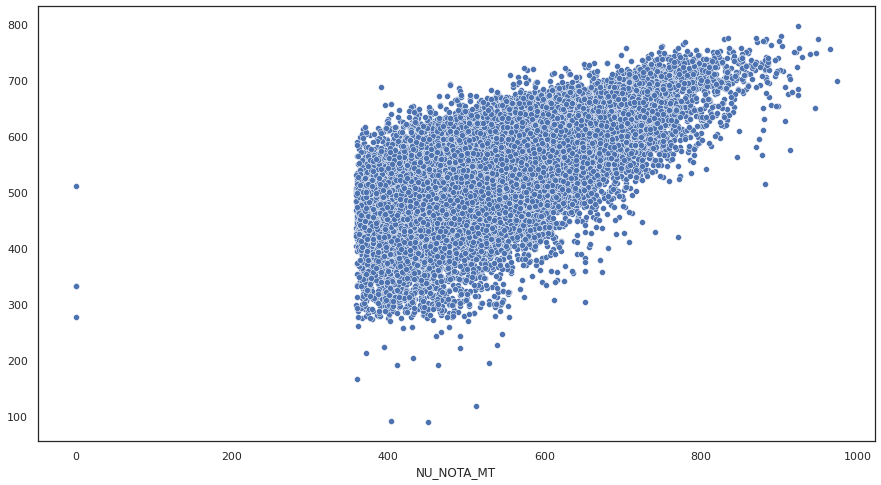

In [82]:
# Plotando com os erros médios entre as notas dos alunos

plt.figure(figsize=(15,8))
sns.scatterplot(x = y_teste, y = x_teste.mean(axis=1))

In [83]:
# Criando um DataFrame com os resultados  

Resultados = pd.DataFrame()
Resultados['Real'] = y_teste
Resultados['Previsao'] = previsoes_matematica
Resultados['Diferenca'] = Resultados["Real"] - Resultados["Previsao"]
Resultados

,Real,Previsao,Diferenca
114991,459.7,420.319501,39.380499
104685,617.2,478.717001,138.482999
91028,520.0,385.706927,134.293073
115802,703.8,459.039807,244.760193
93303,627.1,441.995627,185.104373
...,...,...,...
81393,688.6,482.168386,206.431614
40159,479.1,489.849362,-10.749362
64083,501.4,471.762378,29.637622
84661,772.5,540.546723,231.953277


In [84]:
# Criando um DataFrame com os resultados  

Resultados = pd.DataFrame()
Resultados['Real'] = y_teste
Resultados['Previsao'] = previsoes_matematica
Resultados['Diferenca'] = Resultados["Real"] - Resultados["Previsao"]
Resultados['Quadrado_Diferenca'] = (Resultados["Real"] - Resultados["Previsao"])**2
Resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [85]:
Resultados['Quadrado_Diferenca'].mean()**(1/2)

135.36661229420264

In [86]:

# Avaliando outro modelo

from sklearn.dummy import DummyRegressor
modeloDummy = DummyRegressor()

modeloDummy.fit(x_treino, y_treino)

dummy_previsao = modeloDummy.predict(x_teste)

In [87]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_previsao)

12063.645588509502

In [88]:
mean_squared_error(y_teste, previsoes_matematica)

18324.11972400897

In [89]:
# Diminuindo o MSE e aumentando o grau de confiança no nosso modelo

from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.25)
modelo_tree = DecisionTreeRegressor(max_depth= 3)
modelo_tree.fit(x_treino, y_treino)
modelo_Predict = modelo_tree.predict(x_teste)
mean_squared_error(y_teste, modelo_Predict)

6036.437421356259

In [90]:
from sklearn.model_selection import cross_validate


modelo_tree = DecisionTreeRegressor(max_depth=2)
Resultados = cross_validate(modelo_tree, x, y, scoring = "neg_mean_squared_error")
#Resultados['test_score']
Resultados

{'fit_time': array([0.05754423, 0.05513024, 0.05727482, 0.05356908, 0.05915785]),
 'score_time': array([0.00274754, 0.00264239, 0.00261211, 0.00278449, 0.00261927]),
 'test_score': array([-6317.91361711, -6390.69330384, -6519.97057993, -6702.12730215,
        -6851.82019408])}

In [91]:

modelo_tree = DecisionTreeRegressor(max_depth=2)
Resultados = cross_validate(modelo_tree, x, y, scoring = "neg_mean_squared_error")
Resultados['test_score'] * -1

array([6317.91361711, 6390.69330384, 6519.97057993, 6702.12730215,
       6851.82019408])

In [92]:
# Calculando a média
modelo_tree = DecisionTreeRegressor(max_depth=2)
Resultados = cross_validate(modelo_tree, x, y, scoring = "neg_mean_squared_error")
media_erros = (Resultados['test_score'] * -1).mean()
media_erros

6556.5049994189085

In [93]:
# Calculando o desvio padrão
def calcula_mse(Resultados):
  media_erros = (Resultados['test_score'] * -1).mean()
  desvio_padrao = (Resultados['test_score'] * -1).std()
  limite_inferior = media_erros - (2*desvio_padrao)
  limite_superior = media_erros + (2*desvio_padrao)

  print(f"intervalo de confiança {limite_inferior} - {limite_superior}")

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import numpy as np
seed = 1232
np.random.seed(seed)


partes = KFold(n_splits = 10, shuffle= True)
modelo_tree = DecisionTreeRegressor(max_depth=3)
Resultados = cross_validate(modelo_tree, x, y, cv = partes, scoring = "neg_mean_squared_error")
calcula_mse(Resultados)

intervalo de confiança 5858.741842392759 - 6250.793292491384


In [95]:
def regressor_arvore(nivel):

  partes = KFold(n_splits = 10, shuffle= True)
  modelo_tree = DecisionTreeRegressor(max_depth=nivel)
  Resultados = cross_validate(modelo_tree, x, y, cv = partes, scoring = "neg_mean_squared_error", return_train_score= True)
 # calcula_mse(Resultados)
  print(f"Treino = {(Resultados['train_score']*-1).mean()} | Teste = {(Resultados['test_score']*-1).mean()}")

regressor_arvore(4)


Treino = 5762.549720706319 | Teste = 5819.973197834339


In [96]:
for i in range(1,21):
  regressor_arvore(i)

Treino = 7845.152085204476 | Teste = 7852.578661722339
Treino = 6528.1590788335 | Teste = 6560.0675709754
Treino = 6021.92863409734 | Teste = 6048.916668296289
Treino = 5761.4751623625325 | Teste = 5812.90355872659
Treino = 5599.962306212093 | Teste = 5686.592652131264
Treino = 5471.78832949066 | Teste = 5592.167397529804
Treino = 5369.746510598879 | Teste = 5538.206119793359
Treino = 5277.4043941464515 | Teste = 5538.121582819848
Treino = 5167.140962754189 | Teste = 5603.000180003621
Treino = 5026.666229201677 | Teste = 5723.448366615135
Treino = 4838.423162134481 | Teste = 5929.083943002775
Treino = 4609.416305344329 | Teste = 6152.672916875419
Treino = 4325.166803971296 | Teste = 6458.814257103533
Treino = 4016.4253773900264 | Teste = 6838.155101122271
Treino = 3659.008966160728 | Teste = 7142.535178789522
Treino = 3313.415625334726 | Teste = 7508.399469728925
Treino = 2949.7360603890493 | Teste = 7967.9580628900485
Treino = 2604.766108582965 | Teste = 8332.721864701904
Treino = 223